<a href="https://colab.research.google.com/github/everestso/Summer24/blob/main/SimpleGrad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Gradient Descent Example

In [2]:
import torch

In [ ]:
# prompt: Create a simple gradients descent example using as input integers from range(10) using the equation y= 2 + 3x

# Define the function
def f(x, w):
  return w[0] + w[1] * x

w_orig = (2.0,3.0)
# Initialize the weights
w_test=(0.0,0.0)
w = torch.tensor(w_test, requires_grad=True)
x_list = list(range(10))
y_list = [f(x, w_orig) for x in x_list]
pred_list = [f(x, w_test) for x in x_list]
# Define the input data
print (f"{x_list=}")
print (f"{y_list=}")
print (f"{pred_list=}")
learning_rate=0.03
for _ in range(25):
  print (f"{sum([(y-f(x, w_test))**2 for x,y in zip(x_list,y_list)])}")
  for i in range(10):
    item = i
    w = torch.tensor(w_test, requires_grad=True)
    x = torch.tensor(x_list[item], dtype=torch.float32, requires_grad=True)
    y = torch.tensor(y_list[item], dtype=torch.float32, requires_grad=True)
    loss = (y - f(x, w))**2
    loss.backward()
    #print (f"{w.grad=}")
    w_test = (w[0]-learning_rate* w.grad[0], w[1]-learning_rate*w.grad[1])
    #print (f"{w_test=}")
    w.grad.zero_()

print (f"{w_test[0]:.2f}, {w_test[1]:.2f}, {w_orig=}")


x_list=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_list=[2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0]
pred_list=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3145.0
50.54237365722656
5.835329532623291
2.800790548324585
1.782610535621643
1.1742467880249023
0.7762038707733154
0.5126916170120239
0.3387297987937927
0.22406457364559174
0.14800329506397247
0.09783980995416641
0.06470861285924911
0.042806029319763184
0.02836495265364647
0.01872478984296322
0.012342322617769241
0.008188323117792606
0.005445810034871101
0.003540023695677519
0.0023562167771160603
0.001561347278766334
0.0010232658823952079
0.0006766583537682891
0.00044678631820715964
2.00, 3.00, w_orig=(2.0, 3.0)


In [ ]:
# prompt: Create a simple gradients descent example using as input integers from range(10) using the equation y= 2 + 3x

# Define the function
def f(x, w):
  return w[0] + w[1] * x

w_orig = (3.0,5.0)
# Initialize the weights
w_test=(0.0,0.0)
w = torch.tensor(w_test, requires_grad=True)
x_list = list(range(10))
y_list = [f(x, w_orig) for x in x_list]
pred_list = [f(x, w_test) for x in x_list]
# Define the input data
print (f"{x_list=}")
print (f"{y_list=}")
print (f"{pred_list=}")
learning_rate=0.03
for _ in range(25):
  print (f"{sum([(y-f(x, w_test))**2 for x,y in zip(x_list,y_list)])}")
  for i in range(10):
    item = i
    w = torch.tensor(w_test, requires_grad=True)
    x = torch.tensor(x_list[item], dtype=torch.float32, requires_grad=True)
    y = torch.tensor(y_list[item], dtype=torch.float32, requires_grad=True)
    loss = (y - f(x, w))**2
    loss.backward()
    #print (f"{w.grad=}")
    w_test = (w[0]-learning_rate* w.grad[0], w[1]-learning_rate*w.grad[1])
    #print (f"{w_test=}")
    w.grad.zero_()

print (f"{w_test[0]:.2f}, {w_test[1]:.2f}, {w_orig=}")


x_list=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_list=[3.0, 8.0, 13.0, 18.0, 23.0, 28.0, 33.0, 38.0, 43.0, 48.0]
pred_list=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
8565.0
110.43677520751953
8.197516441345215
3.3766303062438965
2.1074559688568115
1.382805585861206
0.9141682386398315
0.6043360829353333
0.39986687898635864
0.2641352713108063
0.17430467903614044
0.11568157374858856
0.07649444043636322
0.05029994621872902
0.03319070115685463
0.021896418184041977
0.014549586921930313
0.009655408561229706
0.006342933513224125
0.004267261829227209
0.0028012897819280624
0.0018546557985246181
0.0012117711594328284
0.0008367495029233396
0.0005450514145195484
3.00, 5.00, w_orig=(3.0, 5.0)


In [4]:
# Visualize Computation Graph
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

x_list=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_list=[2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0]
pred_list=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3145.0


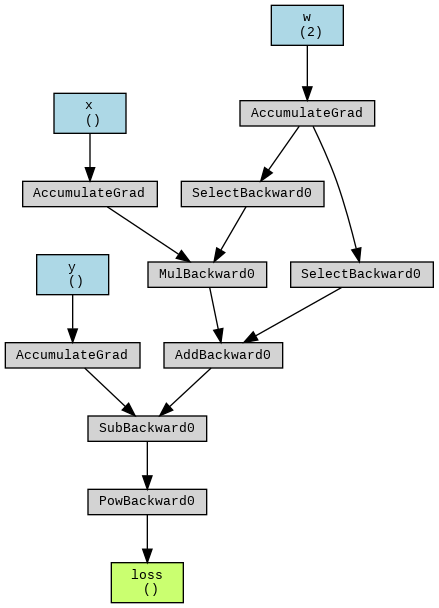

In [9]:
from torchviz import make_dot
from IPython.display import Image

# Define the function
def f(x, w):
  return w[0] + w[1] * x

w_orig = (2.0,3.0)
# Initialize the weights
w_test=(0.0,0.0)
w = torch.tensor(w_test, requires_grad=True)
x_list = list(range(10))
y_list = [f(x, w_orig) for x in x_list]
pred_list = [f(x, w_test) for x in x_list]
# Define the input data
print (f"{x_list=}")
print (f"{y_list=}")
print (f"{pred_list=}")
learning_rate=0.03
print (f"{sum([(y-f(x, w_test))**2 for x,y in zip(x_list,y_list)])}")
item = 4
w = torch.tensor(w_test, requires_grad=True)
x = torch.tensor(x_list[item], dtype=torch.float32, requires_grad=True)
y = torch.tensor(y_list[item], dtype=torch.float32, requires_grad=True)
loss = (y - f(x, w))**2

# Render graph
dot = make_dot(loss, params={'loss': loss, 'w': w, 'x': x, 'y': y})
dot.render("computation_graph", format="png")  # Save the graph as a PNG image

# Display the saved image
Image(filename='computation_graph.png')

